# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
import random

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

# Result storage

In [42]:
df_statistical_tests = pd.DataFrame()
df_predictions_per_model = pd.DataFrame()

# Data Loading

In [3]:
df_train = pd.read_csv('./data_breastCancer/breast-cancer-diagnostic.shuf.lrn.csv', low_memory=False, sep=',')
df_test = pd.read_csv('./data_breastCancer/breast-cancer-diagnostic.shuf.tes.csv', low_memory=False, sep=',')

In [4]:
df_train.head()

ID  MALIGNANT  radiusMean   textureMean   perimeterMean   areaMean  \
0   868682      False       11.43         15.39           73.06      399.8   
1   881972       True       17.05         19.08          113.40      895.0   
2   901315      False       10.57         20.22           70.15      338.3   
3  9112367      False       13.21         25.25           84.10      537.9   
4  8711202       True       17.68         20.74          117.40      963.7   

    smoothnessMean   compactnessMean   concavityMean   concavePointsMean  ...  \
0          0.09639           0.06889         0.03503             0.02875  ...   
1          0.11410           0.15720         0.19100             0.10900  ...   
2          0.09073           0.16600         0.22800             0.05941  ...   
3          0.08791           0.05205         0.02772             0.02068  ...   
4          0.11150           0.16650         0.18550             0.10540  ...   

    radiusWorst   textureWorst   perimeterWorst   areaWorst   smoothnessWorst  \
0         12.32          22.02            79.93       462.0            0.1190   
1         19.59          24.89           133.50      1189.0            0.1703   
2         10.85          22.82            76.51       351.9            0.1143   
3         14.35          34.23            91.29       632.9            0.1289   
4         20.47          25.11           132.90      1302.0            0.1418   

    compactnessWorst   concavityWorst   concavePointsWorst   symmetryWorst  \
0             0.1648           0.1399              0.08476          0.2676   
1             0.3934           0.5018              0.25430          0.3109   
2             0.3619           0.6030              0.14650          0.2597   
3             0.1063           0.1390              0.06005          0.2444   
4             0.3498           0.3583              0.15150          0.2463   

    fractalDimensionWorst  
0                 0.06765  
1                 0.09061  
2                 0.12000  
3                 0.06788  
4                 0.07738  

[5 rows x 32 columns]

# Target and Feature distribution

False    189
True      96
Name: MALIGNANT, dtype: int64

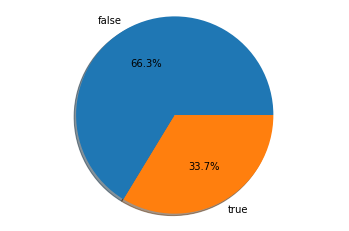

In [5]:
display(df_train['MALIGNANT'].value_counts())

plt.pie( df_train['MALIGNANT'].value_counts() , labels=['false','true'], 
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [6]:
df_train.isnull().sum()

ID                         0
MALIGNANT                  0
radiusMean                 0
 textureMean               0
 perimeterMean             0
 areaMean                  0
 smoothnessMean            0
 compactnessMean           0
 concavityMean             0
 concavePointsMean         0
 symmetryMean              0
 fractalDimensionMean      0
 radiusStdErr              0
 textureStdErr             0
 perimeterStdErr           0
 areaStdErr                0
 smoothnessStdErr          0
 compactnessStdErr         0
 concavityStdErr           0
 concavePointsStdErr       0
 symmetryStdErr            0
 fractalDimensionStdErr    0
 radiusWorst               0
 textureWorst              0
 perimeterWorst            0
 areaWorst                 0
 smoothnessWorst           0
 compactnessWorst          0
 concavityWorst            0
 concavePointsWorst        0
 symmetryWorst             0
 fractalDimensionWorst     0
dtype: int64

# Data Preprocessing

In [7]:
#Create target column
Y = df_train['MALIGNANT']
#Create feature dataframe
X = df_train.drop(['ID','MALIGNANT'],axis=1)
#Create test dataframe
X_test = df_test.drop(['ID'],axis=1)

# Baseline

In [43]:
# Prediction = false 
Y_all_false = [0 for i in range(0, len(Y))]
df_statistical_tests = df_statistical_tests.append({
    'Type': 'Baseline All false',
    'accuracy': accuracy_score(Y, Y_all_false),
    'precision': precision_score(Y, Y_all_false), 
    'recall': recall_score(Y, Y_all_false)
}, ignore_index=True)


df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'Baseline All false',
    'false': np.size(Y_all_false),
    'false %': 100,
    'true': 0,
    'true %': 0,
}, ignore_index=True)


# Prediction = random
Y_random = [random.choice([0, 1]) for i in range(0, len(Y))]
df_statistical_tests = df_statistical_tests.append({
    'Type': 'Baseline All random',
    'accuracy': accuracy_score(Y, Y_random),
    'precision': precision_score(Y, Y_random), 
    'recall': recall_score(Y, Y_random)
}, ignore_index=True)


df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'Baseline All random',
    'false': np.size(Y_random)-np.sum(Y_random),
    'false %': (np.size(Y_random)-np.sum(Y_random))/np.size(Y_random),
    'true':np.sum(Y_random),
    'true %': (np.sum(Y_random))/np.size(Y_random),
}, ignore_index=True)

display(df_statistical_tests)
display(df_predictions_per_model)

C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Type  accuracy  precision    recall
0   Baseline All false  0.663158   0.000000  0.000000
1  Baseline All random  0.578947   0.403226  0.520833

Type  false     false %   true    true %
0   Baseline All false  285.0  100.000000    0.0  0.000000
1  Baseline All random  161.0    0.564912  124.0  0.435088

# Random Forrest: Different Parameters

In [30]:
clf = RandomForestClassifier()

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 30, 50]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0378s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.0s


{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   10.2s finished


# Random Forrest: Prediction

In [44]:
clf = make_pipeline( RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=50))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring = ['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'RandomForest',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'RandomForest',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

Type  accuracy  precision    recall
0   Baseline All false  0.663158   0.000000  0.000000
1  Baseline All random  0.578947   0.403226  0.520833
2         RandomForest  0.954386   0.948440  0.916667

Type  false     false %   true     true %
0   Baseline All false  285.0  100.000000    0.0   0.000000
1  Baseline All random  161.0    0.564912  124.0   0.435088
2         RandomForest  173.0   61.000000  111.0  39.000000

# SVM: Different Parameters

In [11]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.1, stop = 1.0, num = 25)],
    'gamma': ['auto','scale'],
    'kernel' : ['linear','poly','sgmoid','rbf']
    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0690s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0867s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5490s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  

{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [12]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.1, stop = 1.0, num = 10)],
    'gamma': ['auto'],
    'kernel' : ['poly']
    
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   56.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [13]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.01, stop = 0.11, num = 10)],
    'gamma': ['auto'],
    'kernel' : ['poly']
    
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)   

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   57.8s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


{'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}


In [14]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}

cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)            

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0156s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0690s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1139s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:    0.6s


{'C': 0.6732323232323232}


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


# SVM: Different Scaling

In [15]:
clf = make_pipeline(SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.97894737 0.94736842 0.95789474]
0.9614035087719298


In [16]:
clf = make_pipeline(StandardScaler(),SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.73684211 0.76842105 0.67368421]
0.7263157894736841


In [17]:
clf = make_pipeline(RobustScaler(),SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.72631579 0.76842105 0.66315789]
0.7192982456140351


# SVM: Prediction

In [45]:
clf = make_pipeline(SVC(C = 0.01,gamma='auto',kernel='poly'))
clf.fit(X, Y)
# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'SVC',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'SVC',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

Type  accuracy  precision    recall
0   Baseline All false  0.663158   0.000000  0.000000
1  Baseline All random  0.578947   0.403226  0.520833
2         RandomForest  0.954386   0.948440  0.916667
3                  SVC  0.961404   0.958586  0.927083

Type  false     false %   true     true %
0   Baseline All false  285.0  100.000000    0.0   0.000000
1  Baseline All random  161.0    0.564912  124.0   0.435088
2         RandomForest  173.0   61.000000  111.0  39.000000
3                  SVC  180.0   63.000000  104.0  37.000000

# NuSVC: Different Parameter

In [31]:
clf = NuSVC()

parameter_grid= {
    'nu': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0685s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1103s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1914s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    0.5s


{'nu': 0.06939393939393938}


[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


# NuSVC: Different Scaling

In [32]:
clf = make_pipeline(NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.93684211 0.94736842 0.96842105]
0.9508771929824561


In [33]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


In [34]:
clf = make_pipeline(RobustScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


In [35]:
clf = make_pipeline(MinMaxScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.95789474 0.98947368 0.97894737]
0.975438596491228


# NuSVC: Prediction

In [46]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.06939393939393938))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'NuSVC',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'NuSVC',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

Type  accuracy  precision    recall
0   Baseline All false  0.663158   0.000000  0.000000
1  Baseline All random  0.578947   0.403226  0.520833
2         RandomForest  0.954386   0.948440  0.916667
3                  SVC  0.961404   0.958586  0.927083
4                NuSVC  0.975439   0.978472  0.947917

Type  false     false %   true     true %
0   Baseline All false  285.0  100.000000    0.0   0.000000
1  Baseline All random  161.0    0.564912  124.0   0.435088
2         RandomForest  173.0   61.000000  111.0  39.000000
3                  SVC  180.0   63.000000  104.0  37.000000
4                NuSVC  174.0   61.000000  110.0  39.000000

# Neural Network: Different Parameters

In [37]:
clf = MLPClassifier()

parameter_grid= {
    'max_iter': [10,50,100,150,200,300,1000],
    'hidden_layer_sizes' : [(2,2),(3,3),(10,4)]
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    1.6s remaining:    0.1s


{'hidden_layer_sizes': (3, 3), 'max_iter': 1000}


[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    2.2s finished


In [38]:
clf = MLPClassifier(hidden_layer_sizes=(3,3), max_iter = 1000)

clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.33684211 0.74736842 0.93684211]
0.6736842105263158


# MLP: Prediction

In [47]:
clf = MLPClassifier(hidden_layer_sizes=(3,3), max_iter = 1000)
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'MLP',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X_test)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'MLP',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

Type  accuracy  precision    recall
0   Baseline All false  0.663158   0.000000  0.000000
1  Baseline All random  0.578947   0.403226  0.520833
2         RandomForest  0.954386   0.948440  0.916667
3                  SVC  0.961404   0.958586  0.927083
4                NuSVC  0.975439   0.978472  0.947917
5                  MLP  0.635088   0.395109  0.625000

Type  false     false %   true     true %
0   Baseline All false  285.0  100.000000    0.0   0.000000
1  Baseline All random  161.0    0.564912  124.0   0.435088
2         RandomForest  173.0   61.000000  111.0  39.000000
3                  SVC  180.0   63.000000  104.0  37.000000
4                NuSVC  174.0   61.000000  110.0  39.000000
5                  MLP  282.0   99.000000    2.0   1.000000

# Significance Test

In [50]:
df_statistical_tests_complete = df_statistical_tests.copy()

df_statistical_tests_complete = df_statistical_tests_complete.set_index('Type')
display(df_statistical_tests_complete)
print()

measure = 'accuracy'

df_statistical_tests_accuracy =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_accuracy['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_accuracy['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_accuracy['%s(NuSVC)' % measure] = df_statistical_tests_complete.iloc[4][measure]

display (df_statistical_tests_accuracy)

measure = 'precision'

df_statistical_tests_precision =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_precision['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_precision['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_precision['%s(NuSVC)' % measure] = df_statistical_tests_complete.iloc[4][measure]

display (df_statistical_tests_precision)

measure = 'recall'

df_statistical_tests_recall =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_recall['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_recall['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_recall['%s(NuSVC)' % measure] = df_statistical_tests_complete.iloc[4][measure]

display (df_statistical_tests_recall)

accuracy  precision    recall
Type                                              
Baseline All false   0.663158   0.000000  0.000000
Baseline All random  0.578947   0.403226  0.520833
RandomForest         0.954386   0.948440  0.916667
SVC                  0.961404   0.958586  0.927083
NuSVC                0.975439   0.978472  0.947917
MLP                  0.635088   0.395109  0.625000

accuracy  accuracy(Baseline All false)  \
Type                                                   
RandomForest  0.954386                      0.663158   
SVC           0.961404                      0.663158   
NuSVC         0.975439                      0.663158   
MLP           0.635088                      0.663158   

              accuracy(Baseline All random)  accuracy(NuSVC)  
Type                                                          
RandomForest                       0.578947         0.975439  
SVC                                0.578947         0.975439  
NuSVC                              0.578947         0.975439  
MLP                                0.578947         0.975439

precision  precision(Baseline All false)  \
Type                                                     
RandomForest   0.948440                            0.0   
SVC            0.958586                            0.0   
NuSVC          0.978472                            0.0   
MLP            0.395109                            0.0   

              precision(Baseline All random)  precision(NuSVC)  
Type                                                            
RandomForest                        0.403226          0.978472  
SVC                                 0.403226          0.978472  
NuSVC                               0.403226          0.978472  
MLP                                 0.403226          0.978472

recall  recall(Baseline All false)  \
Type                                                 
RandomForest  0.916667                         0.0   
SVC           0.927083                         0.0   
NuSVC         0.947917                         0.0   
MLP           0.625000                         0.0   

              recall(Baseline All random)  recall(NuSVC)  
Type                                                      
RandomForest                     0.520833       0.947917  
SVC                              0.520833       0.947917  
NuSVC                            0.520833       0.947917  
MLP                              0.520833       0.947917